In [24]:
%load_ext autoreload
%autoreload 2


from PKEvolution import PKEvolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Note: redshifts have been re-sorted (earliest first)


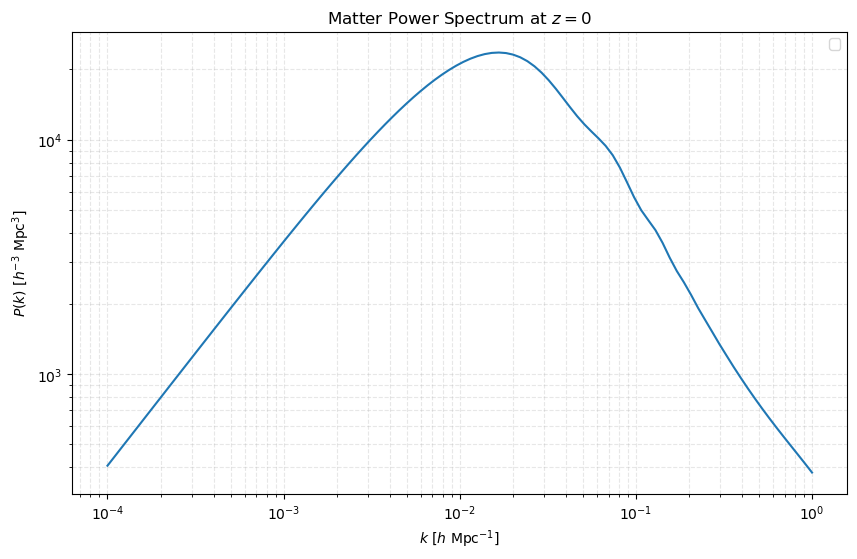

In [28]:
pke=PKEvolution()

pke.mk_pkz()

fig1=pke.plt_pk(z=0)


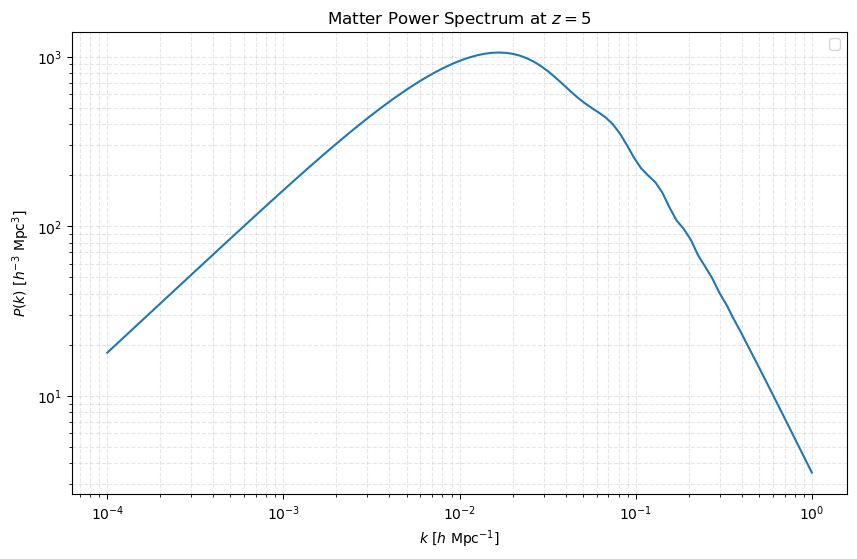

In [29]:

fig2=pke.plt_pk(z=5)


In [ ]:

pke.pk_animation(dpi=200,display=True)

'Animation saved to nonlinear_matter_power_spectrum_evolution.mp4'

# Computing the Density Contrast from the Matter Power Spectrum

In cosmology, the **density contrast** $\delta(\mathbf{x})$ describes fluctuations in matter density relative to the cosmic mean. It can be computed from the **matter power spectrum** $P(k)$ using Fourier methods. Below is a step-by-step guide.

---

## Key Definitions

### Density Contrast
$$
\delta(\mathbf{x}) = \frac{\rho(\mathbf{x}) - \bar{\rho}}{\bar{\rho}},
$$
where:
- $\rho(\mathbf{x})$ = matter density at position $\mathbf{x}$,
- $\bar{\rho}$ = mean matter density of the universe.

### Matter Power Spectrum $P(k)$
The power spectrum quantifies the variance of density fluctuations in Fourier space:
$$
\langle \delta(\mathbf{k}) \delta^*(\mathbf{k'}) \rangle = (2\pi)^3 \delta_D(\mathbf{k} - \mathbf{k'}) P(k),
$$
where:
- $\delta(\mathbf{k})$ = Fourier transform of $\delta(\mathbf{x})$,
- $\delta_D$ = Dirac delta function.

---

## Step-by-Step Calculation

### 1. Generate a Gaussian Random Field
Initial density fluctuations are Gaussian, so $\delta(\mathbf{x})$ is a Gaussian random field.

### 2. Sample Fourier Modes $\delta(\mathbf{k})$
For each wavenumber $\mathbf{k}$:
- Draw a complex Gaussian random variable with variance $P(k)$:
  $$
  \delta(\mathbf{k}) = \sqrt{\frac{P(k)}{2}} (g_1 + i g_2),
  $$
  where $g_1, g_2$ are independent standard normal variables.

### 3. Impose Hermitian Symmetry
To ensure $\delta(\mathbf{x})$ is real-valued:
$$
\delta(-\mathbf{k}) = \delta^*(\mathbf{k}).
$$

### 4. Inverse Fourier Transform
Convert $\delta(\mathbf{k})$ to real space:
$$
\delta(\mathbf{x}) = \int \frac{d^3k}{(2\pi)^3} \delta(\mathbf{k}) e^{i \mathbf{k} \cdot \mathbf{x}}.
$$

### 5. Normalization Check
Verify that the generated field satisfies:
$$
\langle |\delta(\mathbf{k})|^2 \rangle = P(k).
$$



'Animation saved to nonlinear_matter_power_spectrum_evolution.mp4'

In [16]:
pke.kh

array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-04, 7.74263683e-04, 8.49753436e-04,
       9.32603347e-04, 1.02353102e-03, 1.12332403e-03, 1.23284674e-03,
       1.35304777e-03, 1.48496826e-03, 1.62975083e-03, 1.78864953e-03,
       1.96304065e-03, 2.15443469e-03, 2.36448941e-03, 2.59502421e-03,
       2.84803587e-03, 3.12571585e-03, 3.43046929e-03, 3.76493581e-03,
       4.13201240e-03, 4.53487851e-03, 4.97702356e-03, 5.46227722e-03,
       5.99484250e-03, 6.57933225e-03, 7.22080902e-03, 7.92482898e-03,
       8.69749003e-03, 9.54548457e-03, 1.04761575e-02, 1.14975700e-02,
       1.26185688e-02, 1.38488637e-02, 1.51991108e-02, 1.66810054e-02,
      

In [ ]:

import numpy as np
from numpy.fft import fftn, ifftn, fftfreq

def generate_density_field(self,N, L, Pk_func):
    """Generate a Gaussian random density field from $P(k)$."""
    # Generate k-grid
    kx = 2 * np.pi * fftfreq(N, d=L/N)
    ky = 2 * np.pi * fftfreq(N, d=L/N)
    kz = 2 * np.pi * fftfreq(N, d=L/N)
    kx_3d, ky_3d, kz_3d = np.meshgrid(kx, ky, kz, indexing='ij')
    k_mag = np.sqrt(kx_3d**2 + ky_3d**2 + kz_3d**2)

    # Generate Gaussian random modes
    rand_real = np.random.normal(0, 1, (N, N, N))
    rand_imag = np.random.normal(0, 1, (N, N, N))
    delta_k = (rand_real + 1j * rand_imag) * np.sqrt(Pk_func(k_mag))

    # Set DC mode to zero (mean density contrast)
    delta_k[0, 0, 0] = 0

    # Inverse FFT to real space
    delta_x = ifftn(delta_k).real
    return delta_x

# Example power spectrum (e.g., linear $P(k)$ for ΛCDM)
def Pk_func(k):
    return k ** (-2)  # Toy example

# Generate field
N, L = 128, 100.0  # Grid size and box size in Mpc/h
delta_x = generate_density_field(N, L, Pk_func)

/var/folders/hm/rplrtvjs17j_j01xh_8t4l4h0000gr/T/ipykernel_66072/3441650139.py:27: RuntimeWarning: divide by zero encountered in power
  return k ** (-2)  # Toy example


In [15]:
pke.pk

array([[396.85408447, 434.11055346, 474.8601731 , ..., 438.52849448,
        401.54422848, 367.19483391],
       [376.10670225, 411.41557245, 450.03501961, ..., 402.65821477,
        368.24148742, 336.39196507],
       [356.35558804, 389.81031366, 426.40167627, ..., 369.82617172,
        337.81779728, 308.30477594],
       ...,
       [ 18.15321488,  19.85770056,  21.72208034, ...,   5.25759274,
          4.33589877,   3.57756902],
       [ 17.84711535,  19.5228611 ,  21.35580507, ...,   5.15342065,
          4.24815337,   3.50350032],
       [ 17.5486525 ,  19.19637272,  20.99866666, ...,   5.05245044,
          4.16316277,   3.43180851]], shape=(100, 100))

In [ ]:
plt.loglog(a,pk_all['neutrino'])

In [ ]:
powers = results.get_matter_power_spectrum(minkh=1e-4, maxkh=2.0, npoints=200)
kh, z, pk = powers

transfer = results.get_matter_transfer_data()
# Check available transfer function fields
print(transfer.names)


k = transfer.q  # h/Mpc
tf_all_z = transfer.transfer_data  # shape (num_redshifts, num_k, num_fields)
z_index = 0  # index for z=1.0 (we passed one redshift to CAMB earlier)
field_index = 6  # 6 is usually massive neutrinos

neutrino_tf = tf_all_z[z_index, :, field_index]

neutrino_pk = (neutrino_tf * k)**2  # Power spectrum ∝ (k * T(k))²

# Plot neutrino power spectrum
plt.loglog(k, neutrino_pk, label='Massive neutrino P(k)')
plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)$ (unnormalised)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
transfer.q

In [ ]:

# Get transfer functions
transfer = results.get_
k = transfer.q  # Wave numbers in h/Mpc

# z=0 is index 0
tf = transfer

# Column indices: 0=tot, 1=CDM+baryon, 2=CDM, 3=baryon, 4=photon, 5=massless nu, 6=massive nu
# You can confirm by printing transfer.transfer_names

neutrino_tf = tf[:, 6]  # Massive neutrino transfer function at z=0
neutrino_pk = (neutrino_tf * k)**2  # Power spectrum ∝ (k * T(k))²

# Plot neutrino power spectrum
plt.loglog(k, neutrino_pk, label='Massive neutrino P(k)')
plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)$ (unnormalised)')
plt.legend()
plt.grid(True)
plt.show()
